<a href="https://colab.research.google.com/github/Gianca-DLRA/FuentesDatos/blob/main/EntregaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext rpy2.ipython 

# Datos Hipoteticos

## Historia de Monte Carlo

### Inicios

Los métodos Monte Carlo son técnicas numéricas que se basan en el muestreo aleatorio para realizar cálculos aproximados o estimaciones de resultados en problemas complejos. 

La idea fundamental detrás de los métodos Monte Carlo es simular el comportamiento de un sistema o problema mediante la generación de múltiples muestras aleatorias y el análisis estadístico de los resultados obtenidos. Estos métodos se aplican en una amplia gama de disciplinas, como la física, la ingeniería, la economía, la biología, la química, las finanzas y muchos otros campos.

Uno de los primeros experimentos formales de Monte Carlo (el primero documentado en occidente) fue propuesto por Georges-Louis Leclerc. En el calculaba la constante de `Pi`.   
La idea era crear una serie de lineas paralelas, separadas por una distancia `L` que era proporcional a la longitud de las agujas. Despues realizada una serie de experimentos donde aventaba una serie de agujas a la vez y calculaba la distancia promedio entre la aguja y la linea mas cercana. Usando formulas matematicas encontraba constantes relevantes.

[Agujas de Buffon](https://es.wikipedia.org/wiki/Aguja_de_Buffon)
 

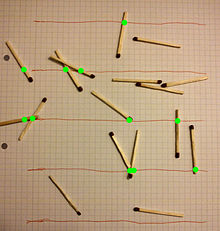

### Ullman, Von Neuman y el ENIAC

Si bien existirian formulaciones de soluciones estilo Monte Carlo realizadas por Laplace y Fermi, pasarian muchos anyos antes de que se formalizara la nocion de Monte Carlo. Probablemente debido a la complejidad de la repeticion de experimentos en el mundo real.

En 1946 Ullman formalizaria y crearia la primera version de los Metodos Montecarlo mientras trabajaba los Alamos creando armas nucleares. Los cientificos necesitaban calcular la difusion de neutrones, pero a pesar de tener los datos necesarios (experimentos) y el conocimiento teorico les era imposible calcular esto.  

Durante la recuperacion de una operacion Ullman estaba jugando solitario y en su aburrimiento decidio calcular la probabilidad de ganar en este juego para pronto darse cuenta que era un ejercicio bastante pesado. Entonces se le ocurrio la idea de que si jugaba muchas partidas (o las simulaba), eventualmente convergeria al resultado. De ahi dio un salto al calculo de la dispersion de neutrones y se lo conto a Johnny Von Neuman, ambos decidieron realizar estas simulaciones en el ENIAC que es considerada la primera computadora moderna.

A partir de esto empezo una nueva era de las matematicas y la probabilidad basada en simulaciones.

[Fuente y resumen historico](https://hammurabi.itam.mx/F/LQL5DHGT9G31U9DTMPLLD5SAM18CMS2368C8BMY4IAQL25HHSV-57404?func=full-set-set&set_number=004106&set_entry=000002&format=999)

## Area de un Circulo

Para ejemplificar esto imagenemos un problema muy sencillo, en el que tenemos que calcular el area de un circulo pero no conocemos ninguna formula apra hacerlo (el circulo es una figura geometrica sencilla, pero podria ser cualquier figura mas compleja).  
La figura geometrica mas sencilla que conocemos es el cuadrado, en la cual es muy facil calcular el area. Entonces usemos esto para resolver el problema.

La idea es tomar un cuadrado lo sufientemente grande para cubrir al circulo, no tiene que ser el cuadrado mas pequenno que cubra al circulo, sino cualquier cuadrado. Aunque es facil calcular este cuadrado, pues simplemente tiene que tener los lados igual al diametro del circulo.

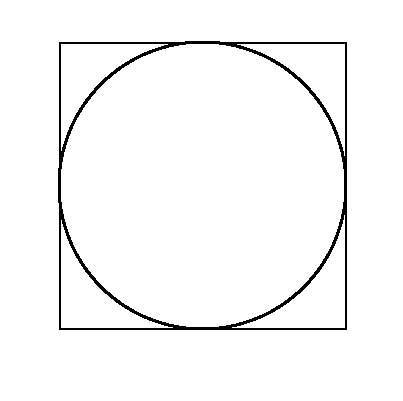

**Tidyverse**
Tidyverse es un conjunto de paquetes de R diseñados para facilitar la manipulación, transformación y visualización de datos. Fue desarrollado por Hadley Wickham y su objetivo principal es proporcionar una forma coherente y eficiente de trabajar con datos en R.

El Tidyverse incluye varios paquetes, entre los cuales los más conocidos y utilizados son:

    dplyr: Proporciona una gramática consistente para manipular y transformar datos, permitiendo realizar operaciones comunes como filtrar filas, seleccionar columnas, agregar datos, ordenar, entre otros.

    ggplot2: Es una biblioteca de visualización de datos que permite crear gráficos de alta calidad de forma fácil y flexible. Se basa en la idea de capas gráficas, lo que permite agregar y personalizar elementos como puntos, líneas, barras y etiquetas.

    tidyr: Proporciona herramientas para reorganizar y transformar datos, especialmente para trabajar con datos en formato "ancho" a formato "largo" y viceversa.

    readr: Proporciona funciones rápidas y eficientes para leer y escribir datos en diferentes formatos, como CSV, TXT, XLSX, entre otros.

    purrr: Ofrece una sintaxis sencilla y coherente para trabajar con estructuras de datos iterativas, como listas y vectores.

In [3]:
%%R
library(tidyverse)


✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



La asignación de valores con `=` es válida en R, pero no sigue la convención de estilo más ampliamente aceptada en la comunidad de R. Además, puede haber situaciones en las que `=` no funcione como se espera, especialmente cuando se utiliza dentro de ciertas funciones o expresiones más complejas.

Por estas razones, se recomienda utilizar `<-` para asignar valores a variables en R. Esto ayuda a mantener la consistencia en el código y evita posibles confusiones.

Las funciones en `R` se definen con el keyword `function` y se utiliza `{}` para delimitarlas (al igual que los `for`s e `if`s.

In [4]:
%%R
# Función para calcular el área del círculo usando Monte Carlo
calculate_circle_area <- function(radius, num_points) {
    # Generar coordenadas aleatorias dentro de un cuadrado que circunscribe el círculo
    x <- runif(num_points, min = -radius, max = radius)
    y <- runif(num_points, min = -radius, max = radius)
    
    # Contar el número de puntos dentro del círculo
    inside_circle <- x^2 + y^2 <= radius^2 # Booleano de si esta no o dentro del circulo
    num_inside_circle <- sum(inside_circle) # Suma de los puntos dentro del circulo
    # Calcular el área aproximada del círculo
    square_area <- (2 * radius)^2
    circle_area <- square_area * (num_inside_circle / num_points)
    
    # Crear tibble (osea un Pandas DataFrame)
    df <- tibble(   x = x,
                    y = y,
                    inside_circle = inside_circle
                 )
    # Graficar con GGplot
    grafica <- ggplot(df, aes(x, y, color = inside_circle)) +
    geom_point() +
    scale_color_manual(values = c("blue", "red")) +
    theme_minimal()

  return(list(circle_area, grafica))
}


[1] "Numero de puntos 1   el area es: 0"
[1] "Numero de puntos 11   el area es: 3.27272727272727"
[1] "Numero de puntos 21   el area es: 2.66666666666667"
[1] "Numero de puntos 31   el area es: 3.2258064516129"
[1] "Numero de puntos 41   el area es: 3.21951219512195"
[1] "Numero de puntos 51   el area es: 3.2156862745098"
[1] "Numero de puntos 61   el area es: 3.08196721311475"
[1] "Numero de puntos 71   el area es: 2.98591549295775"
[1] "Numero de puntos 81   el area es: 3.06172839506173"
[1] "Numero de puntos 91   el area es: 2.94505494505495"
[[1]]



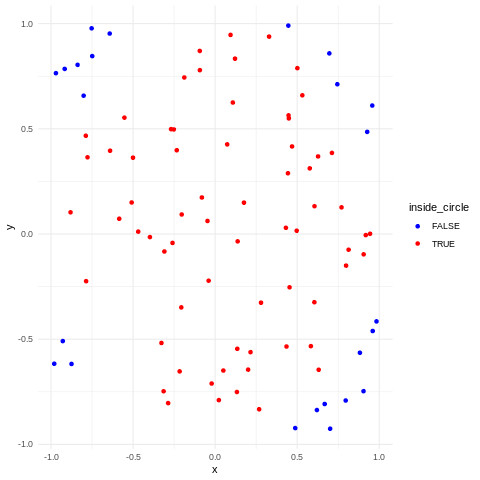

In [5]:
%%R
# Parámetros del círculo y simulación
radius <- 1  # Radio del círculo

for (i in seq(1, 100, 10)) {
    num_points <- i  # Número de puntos aleatorios generados

    # Calcular el área del círculo
    res <- calculate_circle_area(radius, num_points)
    area <- res[1]
    grafica <- res[2]

    # Imprimir el resultado
    mensaje <- paste("Numero de puntos", i, "  el area es:", area)
    print(mensaje)
    }
grafica


[1] "Numero de puntos 100   el area es: 3.32"
[1] "Numero de puntos 200   el area es: 3.02"
[1] "Numero de puntos 300   el area es: 3.21333333333333"
[1] "Numero de puntos 400   el area es: 3.17"
[1] "Numero de puntos 500   el area es: 3.272"
[1] "Numero de puntos 600   el area es: 3.09333333333333"
[1] "Numero de puntos 700   el area es: 3.08571428571429"
[1] "Numero de puntos 800   el area es: 3.15"
[1] "Numero de puntos 900   el area es: 3.2"
[1] "Numero de puntos 1000   el area es: 3.084"
[[1]]



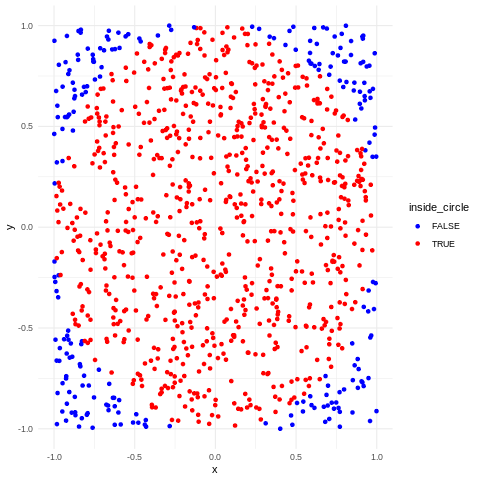

In [6]:
%%R
# Parámetros del círculo y simulación
radius <- 1  # Radio del círculo

for (i in seq(100, 1000, 100)) {
    num_points <- i  # Número de puntos aleatorios generados

    # Calcular el área del círculo
    res <- calculate_circle_area(radius, num_points)
    area <- res[1]
    grafica <- res[2]

    # Imprimir el resultado
    mensaje <- paste("Numero de puntos", i, "  el area es:", area)
    print(mensaje)
    }
grafica


[1] "Numero de puntos 1000   el area es: 3.1"
[1] "Numero de puntos 2000   el area es: 3.108"
[1] "Numero de puntos 3000   el area es: 3.13466666666667"
[1] "Numero de puntos 4000   el area es: 3.134"
[1] "Numero de puntos 5000   el area es: 3.156"
[1] "Numero de puntos 6000   el area es: 3.19466666666667"
[1] "Numero de puntos 7000   el area es: 3.14742857142857"
[1] "Numero de puntos 8000   el area es: 3.1545"
[1] "Numero de puntos 9000   el area es: 3.13777777777778"
[1] "Numero de puntos 10000   el area es: 3.162"
[[1]]



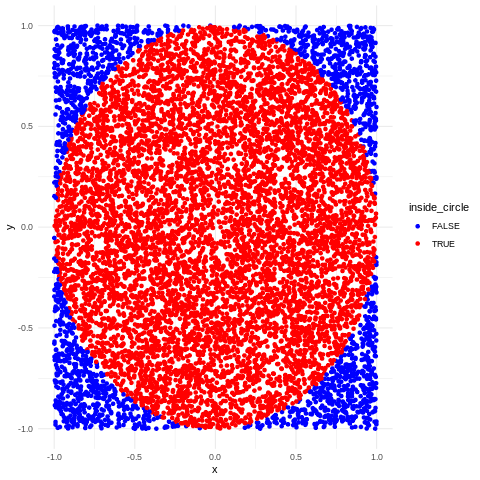

In [7]:
%%R
# Parámetros del círculo y simulación
radius <- 1  # Radio del círculo

for (i in seq(1000, 10000, 1000)){
    num_points <- i  # Número de puntos aleatorios generados

    # Calcular el área del círculo
    res <- calculate_circle_area(radius, num_points)
    area <- res[1]
    grafica <- res[2]

    # Imprimir el resultado
    mensaje <- paste("Numero de puntos", i, "  el area es:", area)
    print(mensaje)
    }
grafica


Creemos una funcion que simula el lanzamiento de una moneda. La funcion recibira 2 parametros la probabilidad de que la moneda caiga en aguila, y el numero de lanzamientos que va a realizar.

Si quisieramos calcular el area de figuras geometricas mas complejas que un circulo bastaria con poder defiir computacionalmente si un punto esta o no dentro de la figura que queremos computar y ponerla dentro de una figura que conozcamos (en nuestro caso fue el cuadrado).

## Numeros Aleatorios

Toda la idea de los algoritmos Monte Carlo esta basada en la aleatoriedad. Imagina que no pudieramos generar los puntos de manera aleatoria. Esto probocaria un sesgo. Por ejemplo, si tu fueras a generar numeros aleatorios probablemente no seria tan aleatorio, pues seguirias un patron o numeros que te gustan.

Tienes alguna idea de como se generan los numeros aleatorios?

En la realidad la computadora utiliza numero pseudoaleatorios. El proceso de generación de números pseudoaleatorios sigue una serie de pasos:   
  
1. Seleccionar una semilla: El PRNG se inicia con una semilla, que es un valor inicial utilizado para generar la secuencia de números. La elección de la semilla puede ser determinada por el sistema operativo, el reloj del sistema u otros métodos para garantizar cierta aleatoriedad en la secuencia generada.
  
2.Algoritmo de generación: El PRNG utiliza un algoritmo matemático para generar números pseudoaleatorios. Este algoritmo toma la semilla inicial y la procesa para generar el siguiente número en la secuencia. El algoritmo debe ser diseñado de tal manera que los números generados se distribuyan de manera uniforme y parezcan aleatorios.
  
3.Actualización de la semilla: Después de generar un número, la semilla se actualiza para generar el siguiente número en la secuencia. Esto permite que la secuencia se extienda y se genere una secuencia más larga de números pseudoaleatorios.

En R utilizamos la funcion `runif` para generar numeros aleatorios.

In [8]:
%%R
runif(1, min = -.5, max = .5)

[1] -0.04436482


Por default el `runif` genera un numero basado en la distribucion Uniforme `[0,1]` 

In [9]:
%%R
runif(1)

[1] 0.01123778


Esta capacidad de las computadoras de poder simular la distribucion Uniforme es una de las bases computacionales de simulacion, pues con esta funcion somos capaces de simular casi cualquier cosa. 

## Ley de los grandes Numeros

La Ley de los Grandes Números es un teorema fundamental en estadística y teoría de la probabilidad que establece que, a medida que el tamaño de una muestra aumenta, la media de esa muestra se aproxima al valor esperado de la población de la cual se extrajo la muestra.

En otras palabras, la Ley de los Grandes Números dice que, si se toman muestras aleatorias suficientemente grandes de una población, la media de esas muestras se acerca cada vez más al valor esperado o promedio de la población original.

[1] "Valor promedio acumulativo: 3.50265"


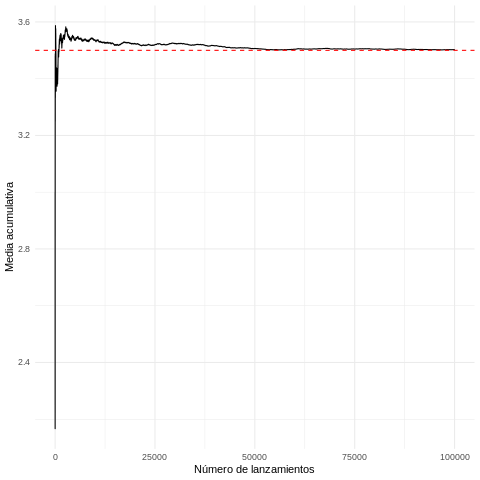

In [10]:
%%R
# Función para simular el lanzamiento de un dado
simular_lanzamiento <- function() {
  sample(1:6, 1, replace = TRUE)
}

# Número de lanzamientos
num_lanzamientos <- 100000

# Realizar los lanzamientos
lanzamientos <- map_dbl(1:num_lanzamientos, ~simular_lanzamiento())

# Calcular la media acumulativa
media_acumulativa <- cumsum(lanzamientos) / seq_along(lanzamientos)


# Calcular la media acumulativa
media_acumulativa <- cumsum(lanzamientos) / seq_along(lanzamientos)

# Imprimir el valor promedio acumulativo
print(paste("Valor promedio acumulativo:", tail(media_acumulativa, 1)))

# Crear un dataframe con los resultados
df_resultados <- tibble(lanzamiento = 1:num_lanzamientos, media_acumulativa)

# Gráfico de la media acumulativa
ggplot(df_resultados, aes(lanzamiento, media_acumulativa)) +
  geom_line() +
  geom_hline(yintercept = 3.5, linetype = "dashed", color = "red") +
  labs(x = "Número de lanzamientos", y = "Media acumulativa") +
  theme_minimal()


La Ley de los Grandes Números es relevante en muchas áreas de la estadística y la ciencia. Permite inferir conclusiones sobre una población utilizando muestras, ya que proporciona una base teórica para la estimación de parámetros poblacionales y para hacer predicciones.

La ley tiene dos formulaciones principales:

La Ley Fuerte de los Grandes Números: Establece que, dada una secuencia de variables aleatorias independientes e idénticamente distribuidas, la media de esas variables convergerá casi seguramente al valor esperado cuando el número de variables tienda al infinito.

La Ley Débil de los Grandes Números: Establece que, dada una secuencia de variables aleatorias independientes e idénticamente distribuidas con una varianza finita, la media de esas variables converge en probabilidad al valor esperado a medida que el número de variables tiende al infinito.

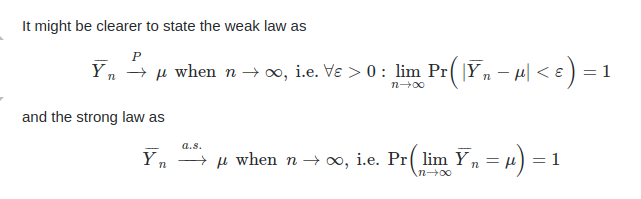

Puedes pensar en la ley débil como diciendo que el promedio de la muestra suele estar cerca de la media cuando el tamaño de la muestra es grande, y la ley fuerte como diciendo que el promedio de la muestra casi con seguridad converge a la media a medida que el tamaño de la muestra aumenta.

La Ley Débil de los Grandes Números (WLLN) se cumple, pero no la Ley Fuerte de los Grandes Números (SLLN) cuando tratamos con una secuencia de variables aleatorias X_n que no están idénticamente distribuidas. Por ejemplo, podemos hacer que cada X_n sea una variable aleatoria que sea igual a n con probabilidad 1/n y 0 en otro caso.

Vamos a realizar una simulación en R para demostrar esto. Simularemos múltiples experimentos, cada uno consistiendo de n ensayos, y calcularemos la media muestral para cada experimento. Por favor, ten en cuenta que la SLLN trata de la convergencia "casi segura", que técnicamente requiere un número infinito de ensayos. Nuestra simulación estará limitada a un número finito de ensayos.

Este código genera un gráfico en el que cada línea representa el promedio acumulativo para un experimento diferente a lo largo de muchos ensayos. Verás que los promedios no convergen hacia ningún número fijo, lo que demuestra que la SLLN no se cumple. Sin embargo, la WLLN se cumple en el sentido de que si eligiéramos cualquier epsilon > 0, la probabilidad de que la diferencia entre el promedio de la muestra y el valor esperado (1) sea mayor que epsilon tiende a cero a medida que aumenta el número de ensayos.


In [11]:
%%R

# función para generar una variable aleatoria X_n
generar_Xn <- function(n) {
  if (runif(1) < 1/n) {
    return(n)
  } else {
    return(0)
  }
}

# número de ensayos en cada experimento
n_ensayos <- 1000

# número de experimentos
n_experimentos <- 2

# Generar los datos
data <- tibble(experimento = 1:n_experimentos) %>%
  mutate(ensayos = map(experimento, ~tibble(ensayo = 1:n_ensayos,
                                             Xn = map_dbl(ensayo, generar_Xn)))) %>%
  unnest(ensayos) %>%
  group_by(experimento) %>%
  mutate(promedio_acumulativo = cummean(Xn))

# traza la línea de convergencia esperada (1) y también la línea y=0
lineas <- tibble(x = c(0, n_ensayos),
                 y = c(1, 1),
                 label = "Convergencia esperada") %>%
  bind_rows(tibble(x = c(0, n_ensayos),
                   y = c(0, 0),
                   label = "y = 0"))

# Dibuja los promedios acumulativos
p <- ggplot() +
  geom_line(data = data, aes(x = ensayo, y = promedio_acumulativo), alpha = 0.3, size = 0.5) +
  geom_line(data = lineas, aes(x = x, y = y, color = label), linewidth = 2) +
  scale_color_manual(values = c("Convergencia esperada" = "blue", "y = 0" = "red")) +
  labs(x = "Número de ensayos", y = "Promedio acumulativo",
       title = "Promedios acumulativos a lo largo del tiempo en múltiples experimentos",
       color = "Leyendas") +
  theme_minimal() +
  theme(text = element_text(size = 20)) # Incrementamos el tamaño del texto para aumentar el tamaño del gráfico

# Ahora podemos controlar el tamaño de la gráfica utilizando las opciones de visualización en ggsave
ggsave("grafica.png", plot = p, width = 6, height = 6)

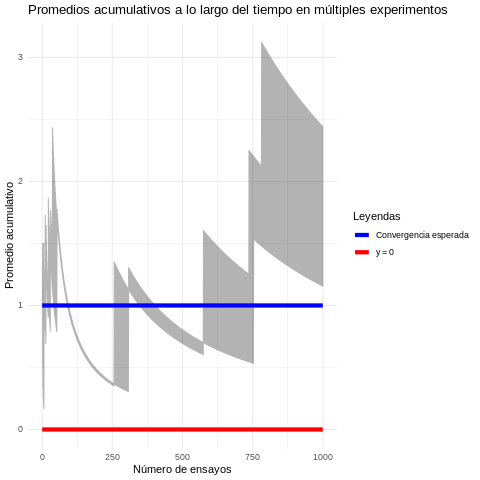

In [12]:
%%R
# Dibuja los promedios acumulativos
ggplot() +
  geom_line(data = data, aes(x = ensayo, y = promedio_acumulativo), alpha = 0.3, size = 0.5) +
  geom_line(data = lineas, aes(x = x, y = y, color = label), linewidth = 2) +
  scale_color_manual(values = c("Convergencia esperada" = "blue", "y = 0" = "red")) +
  labs(x = "Número de ensayos", y = "Promedio acumulativo",
       title = "Promedios acumulativos a lo largo del tiempo en múltiples experimentos",
       color = "Leyendas") +
  theme_minimal()


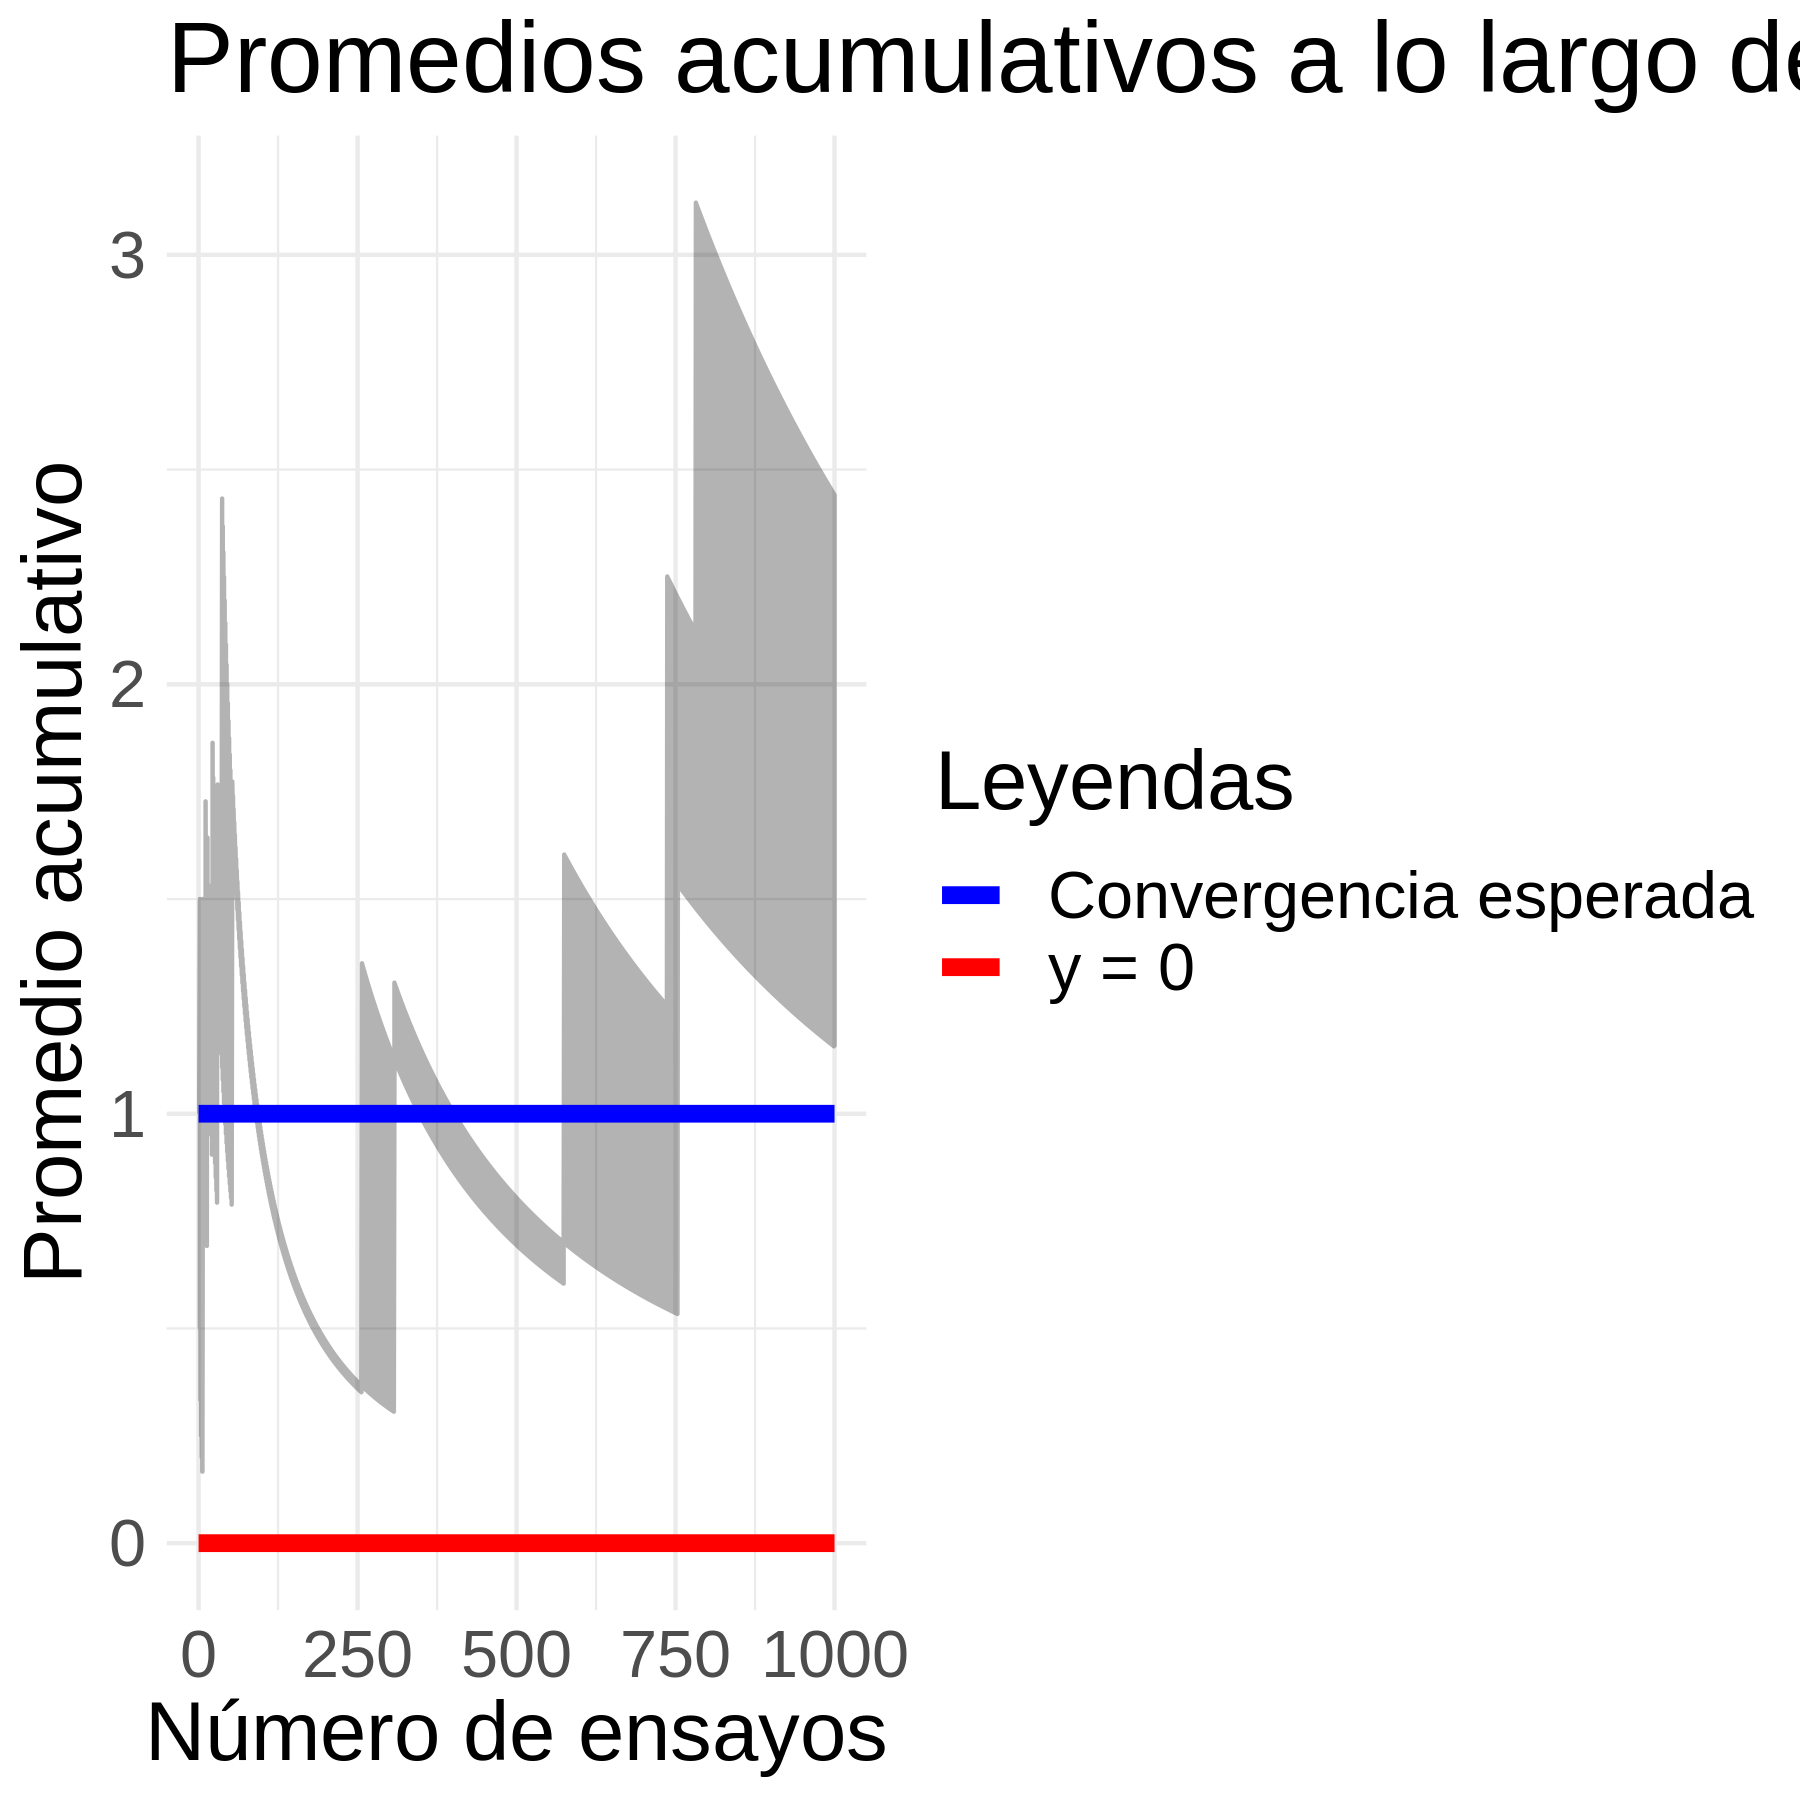

In [13]:
from IPython.display import Image, display
display(Image(filename="grafica.png"))

La línea horizontal en y=0 (en rojo), que es el valor al que la mayoría de las muestras Xn convergen.  
Y otra línea horizontal en y=1 (en azul), que es el valor esperado de Xn (el valor promedio que se obtendría si se realizaran infinitas pruebas).   

La línea azul en y=1 indica la expectativa matemática de nuestra variable aleatoria, es decir, el valor al que debería converger el promedio a medida que el número de pruebas se acerca al infinito, de acuerdo con la Ley de los Grandes Números. En nuestro caso, la variable aleatoria puede tomar el valor de n con una probabilidad de 1/n, y 0 con una probabilidad de 1 - 1/n. La esperanza matemática, o valor esperado, de esta variable aleatoria se calcula de la siguiente manera:

E[X] = n * (1/n) + 0 * (1 - 1/n) = 1

Por lo tanto, el valor esperado es 1, y es por eso que hemos trazado la línea azul en y=1.

La línea roja en y=0 se utiliza simplemente como una línea de referencia para visualizar cuándo el promedio acumulativo de un experimento es 0.

En resumen, la línea azul en y=1 indica el valor al que deberíamos esperar que converjan nuestros promedios a medida que el número de pruebas aumenta, según la Ley de los Grandes Números. Sin embargo, debido a la naturaleza de nuestra variable aleatoria y la manera en que hemos definido Xn, los promedios no convergen casi seguramente a 1 como lo harían bajo la Ley Fuerte de los Grandes Números. Por lo tanto, este ejemplo satisface la Ley Débil de los Grandes Números, pero no la Ley Fuerte.


Verás que los promedios de las muestras para cada experimento fluctúan alrededor de estas líneas, lo que ilustra la idea de que la WLLN se cumple (los promedios de las muestras tienden a estar cerca del valor esperado a medida que aumenta el número de pruebas) pero la SLLN no se cumple (no todas las líneas de los experimentos convergen al valor esperado).


## Teorema del Limite Central

El Teorema del Límite Central (TLC) es un teorema fundamental en la teoría de probabilidad y estadística. Señala que cuando se suman un gran número de variables aleatorias independientes e idénticamente distribuidas (i.i.d.), la suma (o promedio) se aproxima a una distribución normal, sin importar la forma de la distribución original de la variable aleatoria.

En otras palabras, si X1, X2, ..., Xn son variables aleatorias i.i.d., cada una con una media μ y una varianza σ^2, entonces la suma (X1 + X2 + ... + Xn) se distribuirá aproximadamente como una normal con media nμ y varianza nσ^2 para valores grandes de n. Además, el promedio (X1 + X2 + ... + Xn)/n se distribuirá aproximadamente como una normal con media μ y varianza σ^2/n.

Podemos ilustrar el TLC en R mediante la simulación de lanzamientos de un dado. El lanzamiento de un dado es una variable aleatoria discreta uniformemente distribuida con una media de 3.5 y una varianza de 35/12.

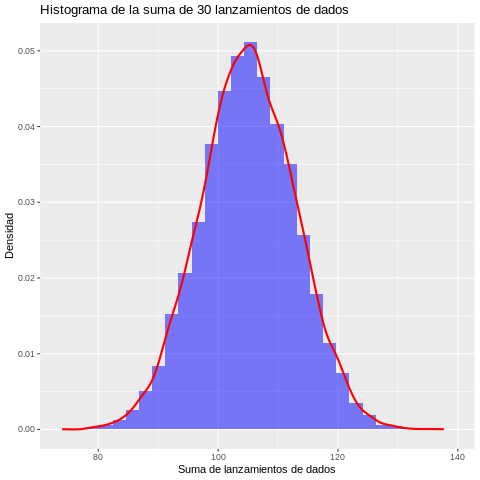

In [14]:
%%R
# definir el número de dados lanzados y el número de experimentos
n_dados <- 30   
n_experimentos <- 10000

# generar las sumas de los lanzamientos de los dados
sumas <- replicate(n_experimentos, sum(runif(n_dados, min = 1, max = 6)))

# generar el histograma de las sumas
hist_data <- data.frame(suma = sumas)
p <- ggplot(hist_data, aes(x = suma)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.5) +
  geom_density(color = "red", lwd = 1) +  # añade una densidad de trazado para comparar con la distribución normal
  labs(x = "Suma de lanzamientos de dados", y = "Densidad",
       title = sprintf("Histograma de la suma de %d lanzamientos de dados", n_dados))

print(p)

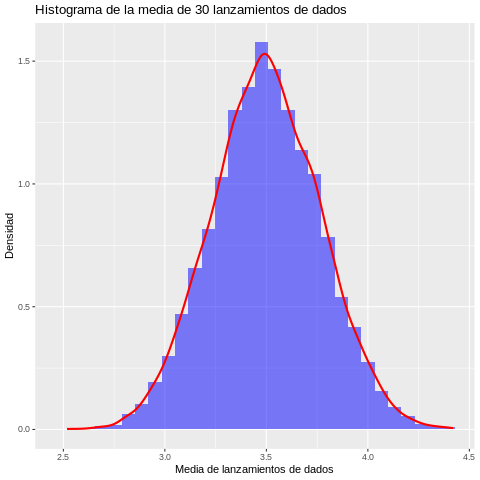

In [15]:
%%R
# definir el número de dados lanzados y el número de experimentos
n_dados <- 30
n_experimentos <- 10000

# generar las medias de los lanzamientos de los dados
medias <- replicate(n_experimentos, mean(runif(n_dados, min = 1, max = 6)))

# generar el histograma de las medias
hist_data <- data.frame(media = medias)
p <- ggplot(hist_data, aes(x = media)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.5) +
  geom_density(color = "red", lwd = 1) +  # añade una densidad de trazado para comparar con la distribución normal
  labs(x = "Media de lanzamientos de dados", y = "Densidad",
       title = sprintf("Histograma de la media de %d lanzamientos de dados", n_dados))
print(p)